<a href="https://colab.research.google.com/github/hemapriyamanne/Detecting-fraudulent-credit-card-transactions-using-Gaussian-Mixture-Models/blob/main/Copy_of_Taming_EM_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Taming Expectation Maximization Algorithm**

Let us suppose we have a dataset with us, and we need to to estimate the probability distribution for this dataset. In order to do this, we define sometthing called a likelihood function, which is a function of the various parameters of a probability distribution, and which gives us the probability that the given data that's being observed is generated from a probability distribution with the given parameters. 


*   Let $X_i^n$ be a sample from $f(x; {\theta})$. The quantity $L(X_1,\dotsc, X_n; \theta) = \prod_{i=1}^n f(X_i; \theta)$ which is regarded as a function of $\theta$ given the observation $X_i^n$ is called the likelihood of the sample

Given a likelihood function and our dataset, our objective is to find out a set of parameters, for which we can maximize the value of our likelihood function, that is, we need to find a probability distribution which will be a good fit to our dataset.

*   Suppose $\widetilde{\theta} \in \Omega$ (where $\Omega$ is the parameter space) is such that $L(\widetilde{\theta}) = Max_{\theta \in \Omega}L(\theta)$, then $\widetilde{\theta}$ is said to be the Maximum Likelihood Estimator (MLE) of ${\theta}$.











#### Expectation Maximization

A limitation of maximum likelihood estimation is that it assumes that the dataset is complete, or fully observed. This does not mean that the model has access to all data; instead, it assumes that all variables that are relevant to the problem are present.

This is not always the case. There may be datasets where only some of the relevant variables can be observed, and some cannot, and although they influence other random variables in the dataset, they remain hidden. More generally, these unobserved or hidden variables are referred to as latent variables. 

Conventional maximum likelihood estimation does not work well in the presence of latent variables. It becomes hard, or sometimes impossible to find the MLE after we introduce latent variables in the dataset. 







#### Algorithm


*  The idea of the algorithm is that when direct maximization of $p(X|\theta)$ is complicated, we cam modify the data by introducing a latent variable Z, such that $p(X, Z|\theta)$ can be easily computed.

*   Let us assume we have an initial estimate for the parameter $\theta^{(t)}$, and we want to find a $\theta$, such that $p(X|\theta) > p(X|\theta^{(t)})$.

*   We try to find a $\theta$ which maximizes the value $L(\theta)-L(\theta^{(t)})$.

*   In this calculation, we consider the log-likelihood of the sample,

       \begin{align*}
        l(\theta) = \log L(\theta)
       \end{align*}

*   Now we have

  \begin{align*}
    l(\theta)-l(\theta^{(t)}) &= \log \frac{L(\theta)}{L(\theta^{(t)})}
    = log(\frac{p(X|\theta)}{p(X|\theta^{(t)})})
  \end{align*}

*   Now, we can add the latent variable $Z$ so that $p(X, Z|\theta)$ can be easily computed.
\begin{align*}
    l(\theta)-l(\theta^{(t)}) &= \log\frac{p(X|\theta)}{p(X|\theta^{(t)})}\\
    &= \log\frac{\int p(X, z|\theta)dz}{p(X|\theta^{(t)})}\\
    &= \log \left[\int\frac{p(z|\theta^{(t)}, X)p(X, z|\theta)}{p(z|\theta^{(t)}, X)p(X|\theta^{(t)})} dz \right]\\
    &\geq \int\left[p(z|\theta^{(t)}, X)\log\frac{p(X, z|\theta)}{p(z|\theta^{(t)}, X)p(X|\theta^{(t)})}dz\right]\\
    &= \Delta L(\theta; \theta^{(t)})
\end{align*}

*   Hence, we see that maximizing $\Delta L(\theta; \theta^{(t)})$ also maximizes $L(\theta; \theta^{(t)})$

*   Now, 
\begin{align*}
    \theta^{(t+1)} &= argmax_{\theta}\Delta L(\theta; \theta^{(t)})\\
    &= argmax_{\theta} \int\left[p(z|\theta^{(t)}, X)\log\frac{p(X, z|\theta)}{p(z|\theta^{(t)}, X)p(X|\theta^{(t)})}dz\right]\\
    &= argmax_{\theta} \int p(z|\theta^{(t)}, X)\log(p(X, z|\theta))dz
\end{align*}

*   Now, let us define
\begin{align*}
    Q(\theta; \theta^{(t)}) 
    = \int p(z|\theta^{(t)}, X)\log(p(X, z|\theta))dz
    = E_{Z|\theta^{(t)}, X}[p\log(X, Z|\theta)]
\end{align*}

### **Now, the algorithm becomes**
*   E-Step: Given the parameters $\theta^{(t)}$ from the previous iteration, compute $Q(\theta; \theta^{(t)})$, so that it is only in terms of $\theta$.
*    M-Step: Maximize $Q(\theta; \theta^{(t)})$ w.r.t $\theta$ to obtain the new parameters $\theta^{(t+1)}$.










### **In practical usage , the EM Algorithm becomes**
*    E-Step: Calculate the posterior probabilities using the parameters as given
*    M-Step: Update the parameters using the posterior probabilities.

#### **Derivation for Multivariate Gaussian Mixture**

*   We now apply EM to a mixture of 2 multivariate Gaussian distributions with the mean vector $\boldsymbol{\mu_{k}}$, covariance matrix $\boldsymbol{\Sigma_k}$, and weight $\boldsymbol\lambda$.

*   The distribution of the mixture can be written as
\begin{align*}
    p(\boldsymbol{x}) = \lambda N(\boldsymbol{\mu_1}, \boldsymbol{\Sigma_1}) + (1-\lambda)N(\boldsymbol{\mu_2}, \boldsymbol{\Sigma_2})
\end{align*}

*   We introduce hidden variables $z_1, \dotsc, z_n$ where $z_i=1$ if $x_i$ comes from the 1st distribution, otherwise its 0.

*   The complete log-likelihood can be written as
\begin{align*}
    \log p(\boldsymbol{x_i}, z_i|\theta) &= \log\prod_{k=1}^2\left[\lambda_k\frac{1}{\sqrt{(2\pi)^d|\boldsymbol{\Sigma_k|}}}e^{-\frac{1}{2}(\boldsymbol{x_i}-\boldsymbol{\mu_k})^T\boldsymbol{\Sigma_k}^{-1}(\boldsymbol{x_i}-\boldsymbol{\mu_k})}\right]^{I_i^k}\\
    &= \sum_{k=1}^2{I_i^k}\log\left[\lambda_k\frac{1}{\sqrt{(2\pi)^d|\boldsymbol{\Sigma_k|}}}e^{-\frac{1}{2}(\boldsymbol{x_i}-\boldsymbol{\mu_k})^T\boldsymbol{\Sigma_k}^{-1}(\boldsymbol{x_i}-\boldsymbol{\mu_k})}\right]\\
\end{align*}
\
\begin{align*}
    \text{where $I_i^1$ = $z_i$ and $I_i^2$ = $1-z_i$}
\end{align*}

*   Now $Q(\theta; \theta^{(t)})$ can be written as,

\begin{align*}
    Q(\theta; \theta^{(t)}) 
    &= E\left[\sum_{i=1}^nz_i\log\lambda+(1-z_i)\log(1-\lambda)\right]\\ 
    &+ E\left[\sum_{i=1}^n-z_i\log\sqrt{|\boldsymbol{\Sigma_1|}}-(1-z_i)\log\sqrt{|\boldsymbol{\Sigma_2}|}\right]\\
    &+ E\left[\sum_{k=1}^2\sum_{i=1}^n-I_i^k\frac{1}{2}(x_i-\boldsymbol{\mu_k})^T\boldsymbol{\Sigma_k}^{-1}(x_i-\boldsymbol{\mu_k)}\right]
\end{align*}

*   Now, at the optimum value of $Q(\theta; \theta^{(t)})$, the following condition will be satisfied

\begin{align*}
    \frac{\partial Q(\theta; \theta^{(t)})}{\partial\theta} = 0
\end{align*}

*   We first compute $E(z_i)$ in the E-Step as follows

\begin{align*}
    E(z_i) = \frac{\lambda^{(t)}N(\boldsymbol{x_i}|\boldsymbol{\mu_1}^{(t)},\boldsymbol{\Sigma_1}^{(t)})}{\lambda^{(t)}N(\boldsymbol{x_i}|\boldsymbol{\mu_1}^{(t)},\boldsymbol{\Sigma_1}^{(t)})+(1-\lambda^{(t)})N(\boldsymbol{x_i}|\boldsymbol{\mu_2}^{(t)},\boldsymbol{\Sigma_2}^{(t)})}
\end{align*}

*   Let $m_i^1=E(z_i)$ and $m_i^2=1-E(z_i)$, and in the M-Step, by maximizing $Q(\theta; \theta^{(t)})$ we have,

\begin{align*}
    \lambda^{(t+1)} &= \frac{1}{n}\sum_{i=1}^{n}m_i^1\\
    \boldsymbol{\mu_j}^{(t+1)} &= \frac{\sum_{i=1}^{n}m_i^j\boldsymbol{x_i}}{\sum_{i=1}^{n}m_i^j} \quad j=0,1\\
    \boldsymbol{\Sigma_j}^{(t+1)} &= \frac{\sum_{i=1}^{n}m_i^j({\boldsymbol{x_i}}-\boldsymbol{\mu_j}^{(t+1)})(\boldsymbol{x_i}-\boldsymbol{\mu_j}^{(t+1)})^T}{\sum_{i=1}^{n}m_i^j} \quad j=0,1
\end{align*}








In this dataset , we are given various values for variables of a trasaction and a label whether the transaction is fraud or not.

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle"

In [9]:
%cd /content/gdrive/MyDrive/kaggle

/content/gdrive/MyDrive/kaggle


In [10]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

 92% 61.0M/66.0M [00:01<00:00, 44.8MB/s]
100% 66.0M/66.0M [00:01<00:00, 59.3MB/s]


In [11]:
!ls

creditcardfraud.zip  kaggle.json


In [12]:
!unzip \*.zip  && rm *.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [17]:
df = pd.read_csv('creditcard.csv') # add the path to creditcard.csv here
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

We can get the correlation of all the variables and we could see that V14 and V17 are the most correlated

In [18]:
c=df.cov()
c["V14"]["V17"]

1.0510721493779281e-15

By just plotting the variables , we can see that they have normal distribution and the distribution is different for both fraud and not fraud transactions.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

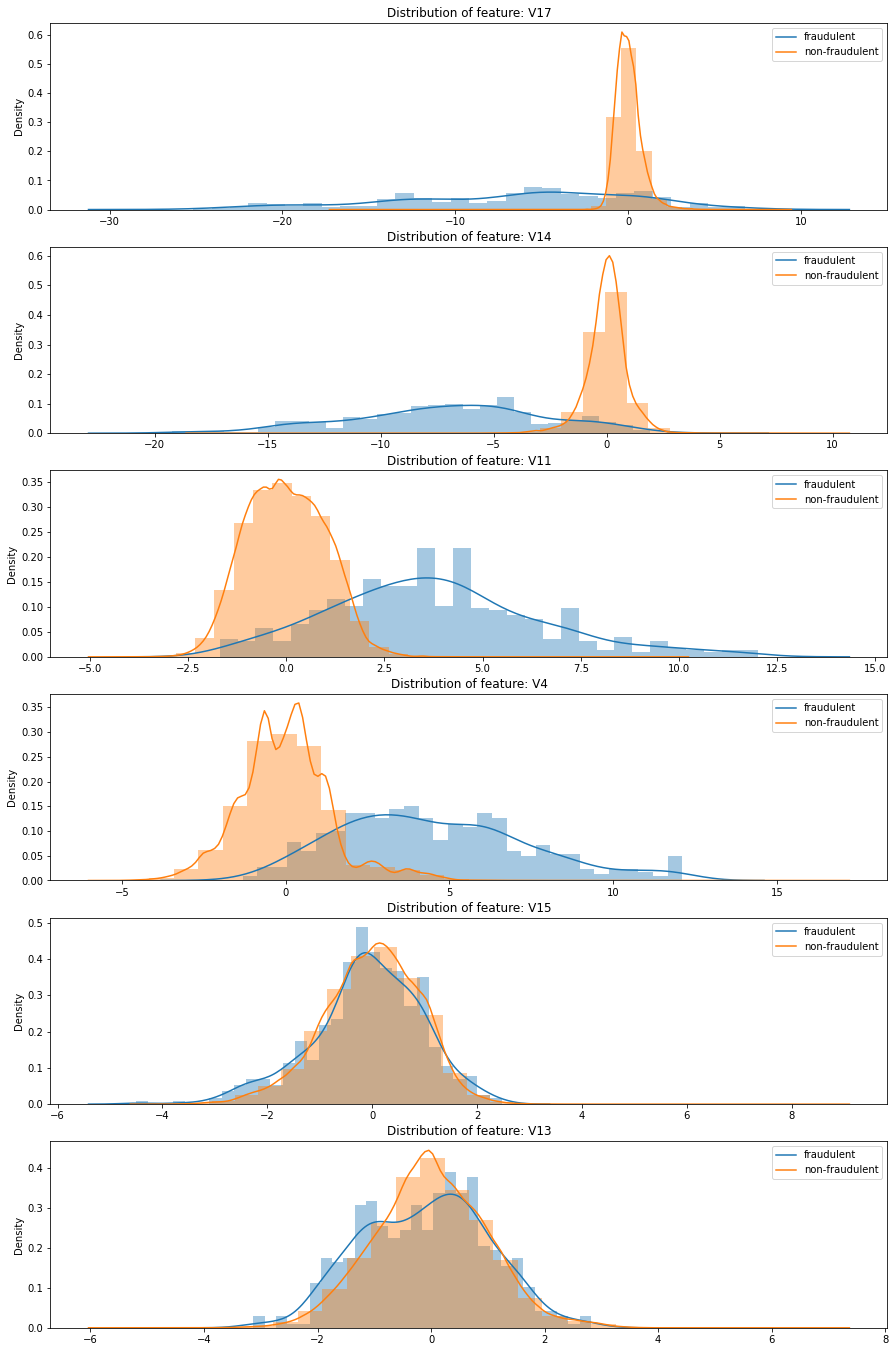

In [19]:
import matplotlib.gridspec as gridspec
features=['V17','V14', 'V11', 'V4', 'V15', 'V13']
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feat][df.Class==1], bins=30)
    sns.distplot(df[feat][df.Class==0],bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

The basic idea is to find the multivariate normal model to fit the non fraud transactions and then use this model to calculate the probability of a given transaction to be not fraud . For this , we are splitting our non fraud transactions into 2 sets , 90% for training and 10% for testing .

In [20]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
from sklearn import mixture

df_0=df[df.Class==0]    #Dataset with non-fraudulent only
df_1=df[df.Class==1]    #Dataset with fraudulent only
df_0=df_0[['V14', 'V17','Class']]    #Select two most correlated features for now
df_1=df_1[['V14', 'V17', 'Class']]

#Split non-fraudulent data in 90% for training GMM and 10% for cross-validation and testing
X_train, X_test, y_train, y_test = train_test_split(df_0.drop(['Class'],axis=1), df_0['Class'] , test_size=0.1, random_state=0)
#Split the fraudulent data in 50% for cross-validation and 50% for testing
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_1.drop(['Class'],axis=1), df_1['Class'] , test_size=0.5, random_state=0)


# Fit a Gaussian Mixture Model with the two components 'V14' and 'V17'
clf = mixture.GaussianMixture()
clf.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Following are the parameters we got for the model fitting non fraud which we derived using EM Algorithm

In [21]:
print(clf.weights_)
print(clf.means_)
print(clf.converged_)
print(clf.n_iter_)
print(clf.lower_bound_)

[1.]
[[0.01177226 0.01217926]]
True
2
-2.4318083854333694


In python , the library function gaussain mixture gives us an attribute called score samples , which is the negative log probability for a given value to be generated by the obtained model. By our devation a high score sample means low probability of it being a non fraud transaction , which means it is fraud and low score sample means high probability of being a non fraud hence a non fraud transaction , this can be observed in the graph below.

Text(0.5, 1.0, 'Predicted probabilities for test dataset')

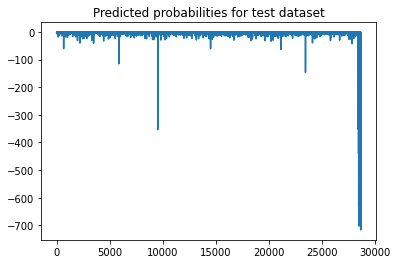

In [22]:
y_test_proba = clf.score_samples(np.vstack([X_test, X_test_1]))
plt.plot(y_test_proba)
plt.title('Predicted probabilities for test dataset')

In [23]:
y_0=clf.score_samples(X_test)
print(y_0[:10])
y_1=clf.score_samples(X_test_1)
print(y_1[:10])

[-1.83636681 -1.79167639 -3.5355716  -1.67242916 -3.03598774 -1.68172439
 -1.81586423 -1.56415936 -2.06794664 -2.17834816]
[ -75.32221727 -254.58233332 -353.27160331 -278.82964445 -110.93541388
 -115.46089576  -85.46198844   -2.0220854  -168.34627411   -6.98918543]


By taking the thresold to be 40 , we have a 0.63 percent accuracy in our prediction usig this model

In [24]:
T=-40
y_test_proba[y_test_proba>=T]=0
y_test_proba[y_test_proba<T]=1
y_test_orig=np.hstack([y_test, y_test_1])

In [25]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test_orig,y_test_proba)

0.6794231491534392

### **Using a Multivariate Normal Distribution**

Using the dataset as above , we can use multiple variables instead of only 2 , to have multivariate normal distribution , using the same method as above and taking 5 variables , we could have the below

In [26]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
from sklearn import mixture

df_0=df[df.Class==0]    #Dataset with non-fraudulent only
df_1=df[df.Class==1]    #Dataset with fraudulent only
df_0=df_0[['V14', 'V17','V11','V4','V13','Class']]    #Select two most correlated features for now
df_1=df_1[['V14', 'V17','V11','V4','V13', 'Class']]

#Split non-fraudulent data in 90% for training GMM and 10% for cross-validation and testing
X_train, X_test, y_train, y_test = train_test_split(df_0.drop(['Class'],axis=1), df_0['Class'] , test_size=0.1, random_state=0)
#Split the fraudulent data in 50% for cross-validation and 50% for testing
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_1.drop(['Class'],axis=1), df_1['Class'] , test_size=0.5, random_state=0)


# Fit a Gaussian Mixture Model with the two components 'V14' and 'V17'
clf = mixture.GaussianMixture()
clf.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [27]:
print(clf.weights_)
print(clf.means_)
print(clf.converged_)
print(clf.n_iter_)
print(clf.lower_bound_)

[1.]
[[ 1.17722616e-02  1.21792592e-02 -7.10644630e-03 -7.52463433e-03
  -5.11609087e-05]]
True
2
-7.011133749657372


Text(0.5, 1.0, 'Predicted probabilities for test dataset')

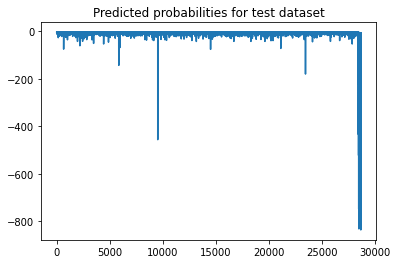

In [28]:
y_test_proba = clf.score_samples(np.vstack([X_test, X_test_1]))
plt.plot(y_test_proba)
plt.title('Predicted probabilities for test dataset')

In [29]:
y_0=clf.score_samples(X_test)
print(y_0[:10])
y_1=clf.score_samples(X_test_1)
print(y_1[:10])

[-5.09075951 -6.04001799 -7.45301986 -6.21519901 -6.58374134 -7.01720231
 -6.44070494 -5.90692027 -6.39818722 -5.86454997]
[ -85.69593726 -300.02324474 -434.92168217 -344.30458328 -171.34130922
 -148.78564707 -119.75621994   -6.21422033 -209.72855073  -14.98837039]


In [30]:
T=-40
y_test_proba[y_test_proba>=T]=0
y_test_proba[y_test_proba<T]=1
y_test_orig=np.hstack([y_test, y_test_1])

In [31]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test_orig,y_test_proba)

0.7014308085435588

We can see that the multivariate model fit gave a better accuracy than bivariate model.

### Advantages and Disadvantages of EM algorithm

#### Advantages:

*   It is always guaranteed that likelihood will increase with each iteration.
*   Implementation is quite straightforward for many types of problems.
*   Very useful in unsupervised learning especially as a clustering algorithm.

#### Disadvantages:

*   It has slow convergence.
*   It makes convergence to the local optima only.






### Clustering with EM vs K-Means

*   While using the K-Means algorithm, we use hard assignment, i.e. while assigning a points to a cluster, a point can only be assigned to one cluster in an interation of the K-means algorithm. But in the case of the EM algorithm, for each point we assign a probability that the point lies in a perticular cluster. 

*   K-means uses the L2-norm while assigning a point to a cluster, i.e. the assignment is based on the distance between the centroid of the cluster to the given point, while EM algorithm assigns a point to a cluster based on the expectation, i.e. the probability of the point belonging to a perticular cluster. Because of this, we see that the K-means algorithm is biased towards forming spherical clusters, whereas in the case of EM algorithm, there is more freedom in the shape of the clusters that can be formed.